https://stepik.org/lesson/1370118/step/1

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_35.py

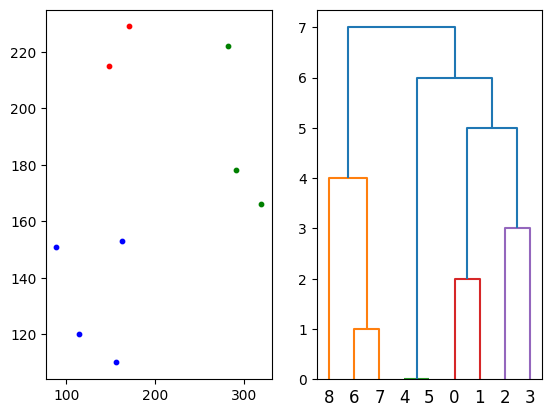

In [ ]:
# Агломеративная иерархическая кластеризация с помощью пакета Sk-Learn

from itertools import cycle
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt


# функция для отображения дендограммы (взято из депозитория sklearn)
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# входные образы для кластеризации
x = [(89, 151), (114, 120), (156, 110), (163, 153), (148, 215), (170, 229), (319, 166), (290, 178), (282, 222)]
x = np.array(x)

NC = 3      # максимальное число кластеров (итоговых)

# агломеративная иерархическая кластеризация
clustering = AgglomerativeClustering(n_clusters=NC, linkage="ward")
x_pr = clustering.fit_predict(x)

# отображение результата кластеризации и дендограммы
f, ax = plt.subplots(1, 2)
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(NC)):
    clst = x[x_pr == n].T
    ax[0].scatter(clst[0], clst[1], s=10, color=c)

plot_dendrogram(clustering, ax=ax[1])
plt.show()